In [52]:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt

In [17]:
data = load_breast_cancer()
X, y = data['data'], data['target']
X.shape, y.shape

((569, 30), (569,))

In [18]:
model = GaussianNB()

In [20]:
model.fit(X, y)
print("The model is trained!")

The model is trained!


In [22]:
y_hat = model.predict(X)

In [25]:
y[0:20], y_hat[0:20]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]))

In [33]:
acc = ((y - y_hat) == 0).sum() / len(y) * 100
print(f'Accuract = {acc:.2f} %')

Accuract = 94.20 %


In [44]:
def classification_metrics(target, pred):
    tn, fp, fn, tp = metrics.confusion_matrix(target, pred).ravel()
    acc = (tp + tn) / (tn + fp + fn + tp)
    sen = tp / (tp + fn)
    spc = tn / (tn + fp)
    prc = tp / (tp + fp)
    return acc, sen, spc, prc

In [45]:
classification_metrics(y, y_hat)

(0.9420035149384886,
 0.9719887955182073,
 0.8915094339622641,
 0.9378378378378378)

In [54]:
prob = model.predict_proba(X)[:,1]
metrics.roc_auc_score(y, prob)

0.9890333491887321

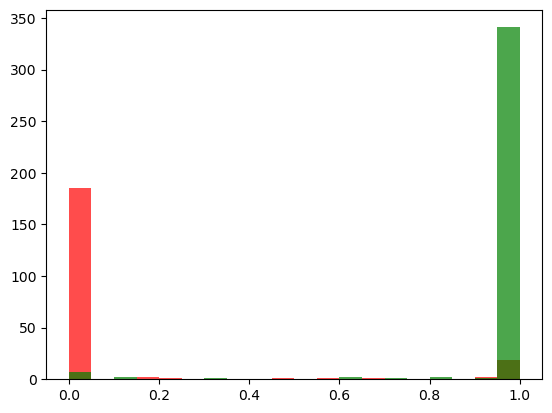

In [57]:
plt.hist(prob[y == 0], bins=20, color="red", alpha=.7);
plt.hist(prob[y == 1], bins=20, color="green", alpha=.7);

In [58]:
fpr, tps, thre = metrics.roc_curve(y, prob)

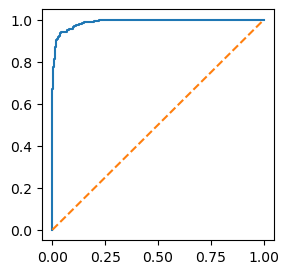

In [63]:
fpr, tps, thre = metrics.roc_curve(y, prob)
plt.figure(figsize=(3, 3))
plt.plot(fpr, tps);
plt.plot([0, 1], [0, 1], linestyle='--')